In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
try:
    df = pd.read_csv(r"advertising.csv")
except Exception:
    print("Error Opening file")

In [11]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### The Dataset contain:
####    * 200 rows and 4 columns
####    * No null values
####    * Features: TV, Radio, Newspaper
####    * Independent Variable: Sales

## TV vs Sales

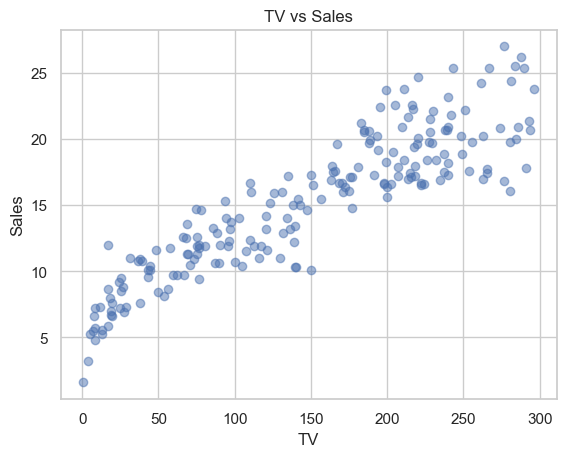

In [14]:
sns.set_theme(style="whitegrid")
plt.scatter(df["TV"], df["Sales"], alpha = 0.5)
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

## Radio vs Sales

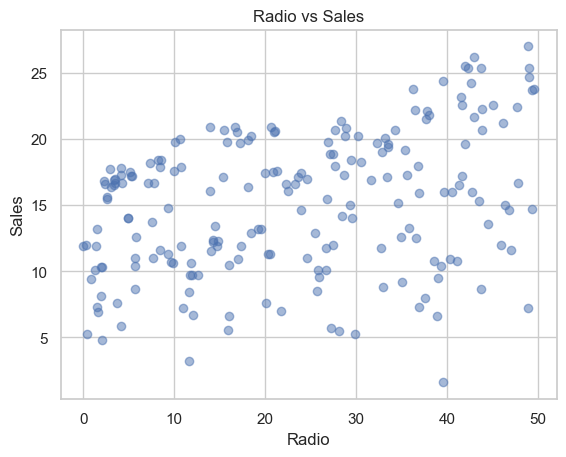

In [15]:
sns.set_theme(style="whitegrid")
plt.scatter(df["Radio"], df["Sales"], alpha = 0.5)
plt.title("Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

## Newspaper vs Sales

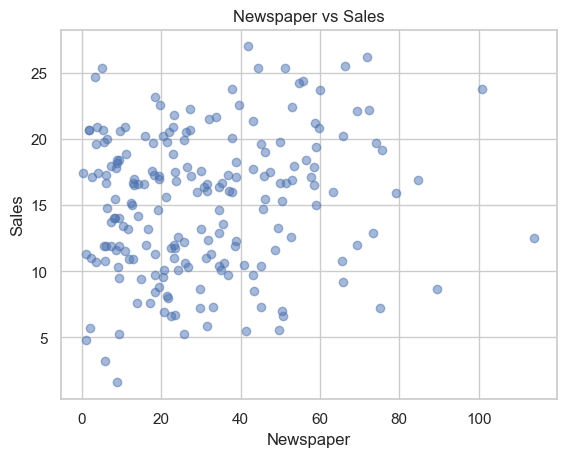

In [16]:
sns.set_theme(style="whitegrid")
plt.scatter(df["Newspaper"], df["Sales"], alpha = 0.5)
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

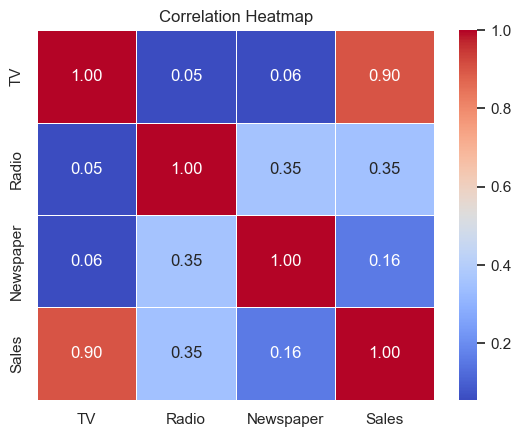

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

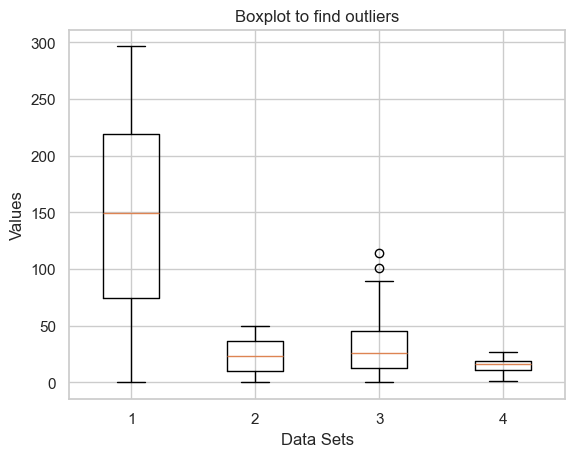

In [ ]:
plt.boxplot(df, patch_artist=True)
plt.title("Boxplot to find outliers")
plt.xlabel("Data Sets")
plt.ylabel("Values")
plt.show()

## Insight from Graphs:
#### * TV is showing good correlation to sales
#### * Radio has medium correlation to sales
#### * Newspaper has low correlation to sales
#### * Outliers are in newspaper column so it is irrelevant

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Model 1 (TV only)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [ ]:
# Create independent variable
X = df[["TV"]]

# Create dependent variable
y = df["Sales"]

In [5]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [6]:
# Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [8]:
# Predicted profit on the test data
y_pred

array([10.92912965,  9.88399105, 12.08313684, 22.93189318, 16.42699412,
       10.22148373,  7.63585439, 20.23195181,  8.45781235, 17.91849399,
       21.38595901, 11.90894708, 15.68668762, 17.38503783, 11.32105662,
       13.70527904, 21.62002651,  7.20037998, 11.22851831, 18.77855596,
       22.81758114, 14.7994085 , 16.6937222 , 14.33127351, 10.07451111,
       13.86313851, 16.17659633, 18.32130782, 19.35555956,  8.52857694,
       10.85292163, 17.98925858, 22.44198446, 20.3190467 ,  7.88080875,
        8.18019741, 10.40656035, 17.00399772, 10.88558221,  8.52313351])

In [12]:
# Actual Profits on test data
np.array(y_test)

array([11.3,  8.4, 12. , 25.4, 16.7,  8.7,  7.2, 18.2,  9.2, 16.6, 24.2,
       10.6, 15.5, 20.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       16.1, 12.9,  8.1, 15.2, 17.6, 22.6, 16.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 17.9, 13.6,  7.2])

In [13]:
# Predicting profit on train data
y_pred_train = regressor.predict(X_train)

# Predicted profit on train data
y_pred_train

array([ 9.1709017 ,  8.87695647, 14.94093769, 18.57170561, 18.88742456,
       12.75267876,  7.63041096,  8.08221567, 14.0046677 , 12.85610393,
       13.1391623 , 19.65494821, 20.97770175, 17.22717836,  9.59548926,
       10.55353297, 23.10608294, 16.55219302, 18.18522207,  7.55964637,
       21.59825279, 17.91849399, 19.0561709 , 15.18044861, 16.48687185,
       19.01262345, 21.46216703, 16.0622843 , 12.62747986, 11.31561319,
       17.22717836, 14.47280269, 22.06094435, 23.296603  , 12.39885579,
       13.1391623 , 21.06479663, 18.27231695, 20.23195181, 17.70620021,
       17.56467103, 12.04503283,  9.50295094,  9.24166629,  7.87536532,
       20.18840437,  8.09854596, 18.63158334,  8.55579409, 16.79714737,
       18.424733  , 10.76038331, 15.31109094, 14.20607461, 12.28998719,
       22.22424726, 22.23513412,  7.58686352, 20.81984227, 16.72638278,
        7.7991573 , 11.27206575, 18.03824945, 19.6876088 , 13.00851997,
       19.4535413 , 16.05139744, 14.29861292, 18.41928957, 16.79

In [18]:
# Test Performance (MSE)
MSE_test = mean_squared_error(y_test,y_pred)
print(MSE_test)

6.6390912265593


In [ ]:
# Train Performance (MSE)
MSE_train = mean_squared_error(y_train, y_pred_train)
print(MSE_train)

4.873755712925826


In [ ]:
# Train Performance (RMSE)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

2.2076584230640903


In [21]:
# Test Performance (RMSE)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

2.576643403065178


In [22]:
# R2 Score in percentage for train data
r2_score_train = r2_score(y_train,y_pred_train)
print("Train:",r2_score_train*100,"%")

# R2 Score in percentage for test data
r2_score_test = r2_score(y_test, y_pred)
print("Test:",r2_score_test*100,"%")

Train: 81.3458812140483 %
Test: 80.10943934328407 %


## Model 2 (TV and Radio)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [5]:
# Create dependent variable
X = df[["TV","Radio"]]

# Create independent variable
y = df["Sales"]

In [6]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [7]:
# Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [9]:
# Predicted profit on the test data
y_pred

array([10.68000732,  8.67289687,  9.59627362, 24.89341048, 14.697364  ,
        8.3567853 , 10.55863443, 18.38868264,  9.85132079, 17.86927795,
       23.41528097, 10.68859833, 13.39700653, 17.10227442, 11.74725693,
       13.31442741, 21.15105215,  9.1078251 , 14.1508319 , 18.85894126,
       24.8577903 , 12.44648472, 16.57547935, 13.79888848,  7.80545687,
       15.11832283, 14.69260423, 20.6616562 , 16.98730791,  8.88795212,
       12.37433351, 20.80729034, 21.28995356, 21.8483045 ,  7.17317454,
        7.05033262,  9.23136496, 15.59516171, 13.27468497,  7.2670912 ])

In [10]:
# Actual Profits on test data
np.array(y_test)

array([11.3,  8.4, 12. , 25.4, 16.7,  8.7,  7.2, 18.2,  9.2, 16.6, 24.2,
       10.6, 15.5, 20.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       16.1, 12.9,  8.1, 15.2, 17.6, 22.6, 16.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 17.9, 13.6,  7.2])

In [11]:
# Predicting profit on train data
y_pred_train = regressor.predict(X_train)

# Predicted profit on train data
y_pred_train

array([10.93805422,  9.11007017, 15.59703766, 18.21568927, 18.85623255,
       13.47550121,  5.41004584, 10.42664085, 15.51043452, 10.9507675 ,
       12.1745831 , 20.56803055, 20.66150248, 16.93586006,  9.94939753,
        9.44200941, 23.52634062, 15.95258174, 18.02199379,  8.19772227,
       19.25035749, 15.6932964 , 17.02223138, 15.23940471, 18.26206619,
       20.06749108, 21.96273051, 17.52532337, 11.15427229, 11.82981591,
       19.45252559, 12.45461085, 22.56326172, 24.59310644, 11.50064457,
       15.85616805, 21.36268308, 19.27266468, 19.42172439, 18.99002523,
       18.11436209, 10.61377871,  9.86927639,  7.17228506,  5.46439517,
       19.24697098, 10.68449498, 19.25273613, 10.37639363, 15.22665486,
       16.73022735,  8.89836238, 16.65383921, 12.2799154 , 10.30546445,
       19.8007574 , 24.93272584,  9.41141864, 22.17652841, 15.82735994,
        9.40064175,  9.9516426 , 15.76724546, 21.20462668, 12.01298646,
       17.72118706, 16.94313453, 16.4482443 , 16.37319409, 17.87

In [12]:
# Test Performance (MSE)
MSE_test = mean_squared_error(y_test,y_pred)
print(MSE_test)

4.476818366208141


In [13]:
# Train Performance (MSE)
MSE_train = mean_squared_error(y_train, y_pred_train)
print(MSE_train)

2.2724752795329857


In [14]:
# Train Performance (RMSE)
RMSE_train = math.sqrt(MSE_train)
print(RMSE_train)

1.507473143884489


In [15]:
# Test Performance (RMSE)
RMSE_test = math.sqrt(MSE_test)
print(RMSE_test)

2.1158493250248567


In [16]:
# R2 Score in percentage for train data
r2_score_train = r2_score(y_train,y_pred_train)
print("Train:",r2_score_train*100,"%")

# R2 Score in percentage for test data
r2_score_test = r2_score(y_test, y_pred)
print("Test:",r2_score_test*100,"%")

Train: 91.30218535776821 %
Test: 86.58755781123509 %


In [19]:
print("How much 1 unit of TV spend increases sales?\n",regressor.coef_[0])
print("How much 1 unit of Radio spend increases sales?\n",regressor.coef_[1])
print("The baseline sales, if ad spend was zero.\n",regressor.intercept_)

How much 1 unit of TV spend increases sales?
 0.0535946734341735
How much 1 unit of Radio spend increases sales?
 0.10989805812677411
The baseline sales, if ad spend was zero.
 4.718345723974636


##### Sales = (0.054 * TV) + (0.110 * Radio) + 4.718

#### The Business Recommendation:-

##### Assuming budgets are in $1,000s and sales are in 1,000s of units:
#####    *Intercept: "Our model predicts baseline sales of 4,718 units even with $0 in advertising."
#####
#####    *TV Coefficient: "For every additional $1,000 spent on TV ads, we can expect sales to increase by 54 units."
#####
#####    *Radio Coefficient: "For every additional $1,000 spent on Radio ads, we can expect sales to increase by 110 units."
#####
#####    *This is the big insight: Your model has proven that, dollar for dollar, Radio advertising is almost twice as effective as TV advertising at driving sales.